## Data Collection and Exploration
    Obtain the Titanic dataset, which includes information about passengers, such as age, sex, class, cabin, and whether they survived or not.
    Explore the dataset to understand the distribution of features, missing values, and potential relationships between variables.

In [1]:
# importing libraries.
import pandas as pd
import numpy as np
import missingno

In [2]:
# read csv file
df = pd.read_csv("data.csv")

In [3]:
df.shape

(200, 4)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

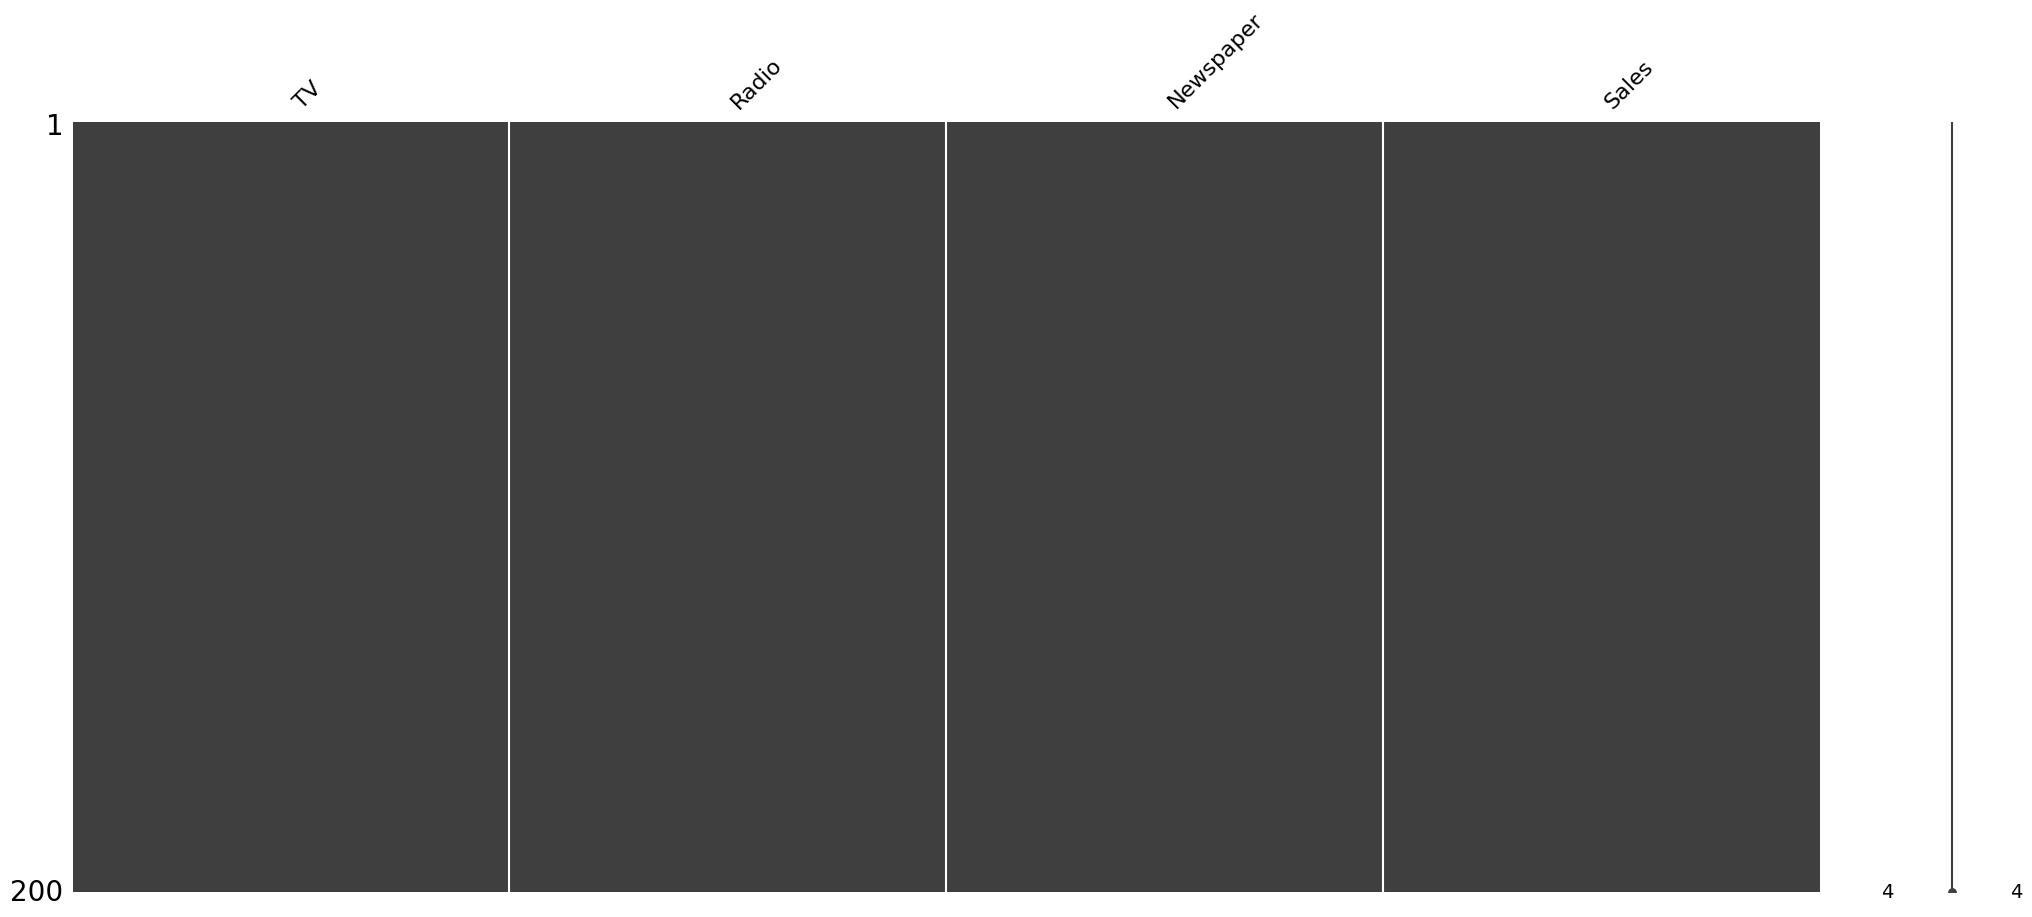

In [7]:
missingno.matrix(df)

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Data Cleaning and Preprocessing

### 1. Handling Missing Data
    Handle missing data: Fill in missing values or remove rows/columns with too many missing values.
    A. Removing Rows or Columns -
        If the missing data is minimal, you may choose to remove rows or columns containing missing values.
    B.Imputation:
        Imputation involves filling in the missing values with estimated or calculated values. Some popular imputation methods include:
            Mean, median, or mode imputation
            Forward fill or backward fill 
    C. Using Predictive Models
    D. Creating an Indicator Variable 

In [10]:
# no data is missing in this dataset.

### 2.Outlier Analysis 

In [11]:
# importing libraries
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

{'whiskers': [<matplotlib.lines.Line2D at 0x23398cebdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x23398d20340>,
 'boxes': [<matplotlib.lines.Line2D at 0x23398cebb20>,
 'medians': [<matplotlib.lines.Line2D at 0x23398d20880>,
 'fliers': [<matplotlib.lines.Line2D at 0x23398d20b20>,
 'means': []}

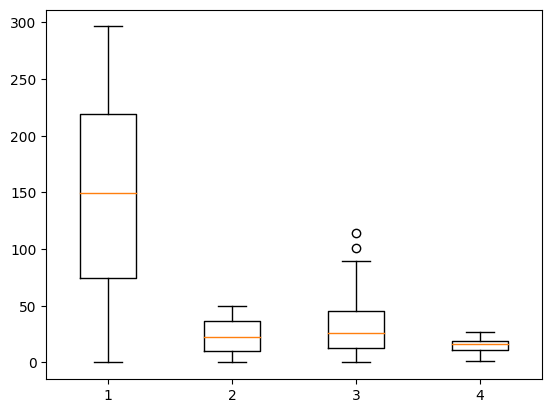

In [12]:
plt.boxplot(df)

Text(0.5, 1.0, 'TV')

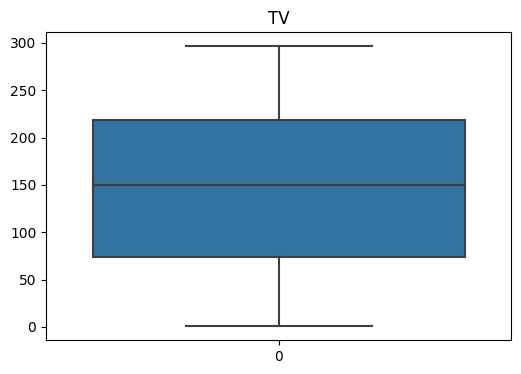

In [13]:
fig, axs = plt.subplots(1, figsize = (6,4))
plt1 = sns.boxplot(df['TV'])
plt.title('TV')

Text(0.5, 1.0, 'Newspaper')

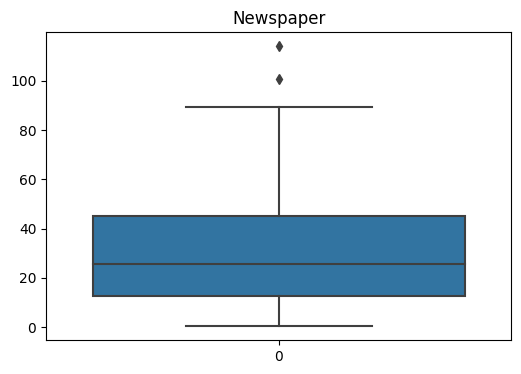

In [14]:
fig, axs = plt.subplots(1, figsize = (6,4))
plt1 = sns.boxplot(df['Newspaper'])
plt.title('Newspaper')

In [15]:
# Newspaper have outliers , calculating z-score (z-score greater than 3 or -3 is considered as outlier)

In [16]:
z_scores = stats.zscore(df['Newspaper'])
print(z_scores.mean())

2.220446049250313e-16


In [17]:
# these outliers are ignoreable . no considerable outliers present in the data. 

Text(0.5, 1.0, 'Radio')

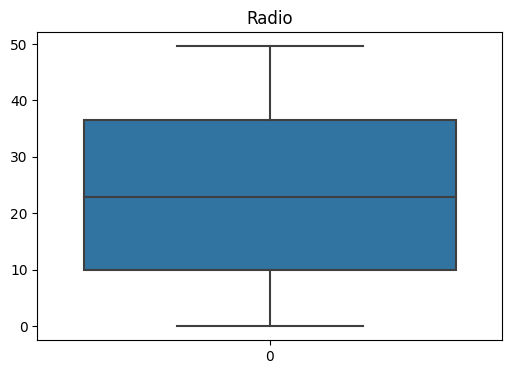

In [18]:
fig, axs = plt.subplots(1, figsize = (6,4))
plt1 = sns.boxplot(df['Radio'])
plt.title('Radio')

## Feature Engineering
    Feature engineering is the process of transforming raw data into meaningful features that can be used as inputs for machine learning algorithms. It involves selecting, creating, and transforming features to improve the performance of machine learning models and make them more effective in solving a particular problem.
    Create new features that might have predictive power.Good feature engineering can significantly impact the accuracy and robustness of a model.

In [19]:
# importing libraries .
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


array([[<Axes: xlabel='TV', ylabel='TV'>,
        <Axes: xlabel='Radio', ylabel='TV'>,
        <Axes: xlabel='Newspaper', ylabel='TV'>,
        <Axes: xlabel='Sales', ylabel='TV'>],
       [<Axes: xlabel='TV', ylabel='Radio'>,
        <Axes: xlabel='Radio', ylabel='Radio'>,
        <Axes: xlabel='Newspaper', ylabel='Radio'>,
        <Axes: xlabel='Sales', ylabel='Radio'>],
       [<Axes: xlabel='TV', ylabel='Newspaper'>,
        <Axes: xlabel='Radio', ylabel='Newspaper'>,
        <Axes: xlabel='Newspaper', ylabel='Newspaper'>,
        <Axes: xlabel='Sales', ylabel='Newspaper'>],
       [<Axes: xlabel='TV', ylabel='Sales'>,
        <Axes: xlabel='Radio', ylabel='Sales'>,
        <Axes: xlabel='Newspaper', ylabel='Sales'>,
        <Axes: xlabel='Sales', ylabel='Sales'>]], dtype=object)

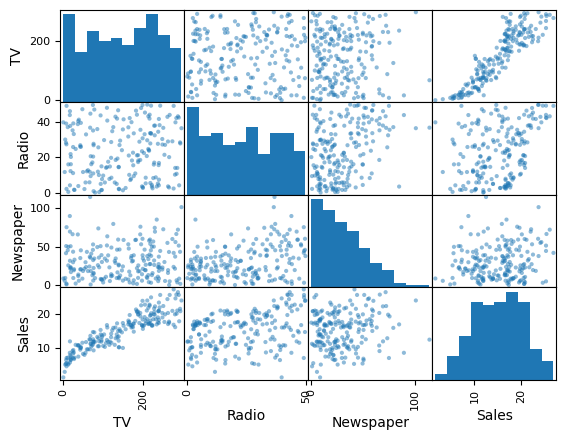

In [21]:
attributes = ['TV','Radio','Newspaper','Sales']
scatter_matrix(df[attributes])

In [22]:
# Calculating Correlation between different columns of the dataset.
# In general, the following guidelines are often used to interpret the strength of the correlation coefficient:
#    |r| > 0.8: Strong correlation
#    0.5 < |r| < 0.8: Moderate correlation
#    0.3 < |r| < 0.5: Weak correlation
#    |r| < 0.3: Very weak or no correlation

In [23]:
corr_matrix = df.corr()
# calculate correlation between Sales and other column.
corr_matrix['Sales'].sort_values(ascending = False)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

In [24]:
#Result
# TV and Sales - strong correlation

In [25]:
corr_matrix = df.corr()
# calculate correlation between TV and other column.
corr_matrix['TV'].sort_values(ascending = False)

TV           1.000000
Sales        0.901208
Newspaper    0.056648
Radio        0.054809
Name: TV, dtype: float64

In [26]:
# No considerable correlation.

In [27]:
corr_matrix = df.corr()
# calculate correlation between Radio and other column.
corr_matrix['Radio'].sort_values(ascending = False)

Radio        1.000000
Newspaper    0.354104
Sales        0.349631
TV           0.054809
Name: Radio, dtype: float64

In [28]:
# No considerable correlation .

In [29]:
corr_matrix = df.corr()
# calculate correlation between Newspaper and other column.
corr_matrix['Newspaper'].sort_values(ascending = False)

Newspaper    1.000000
Radio        0.354104
Sales        0.157960
TV           0.056648
Name: Newspaper, dtype: float64

In [30]:
# No considerable correlation

<Axes: xlabel='TV', ylabel='Sales'>

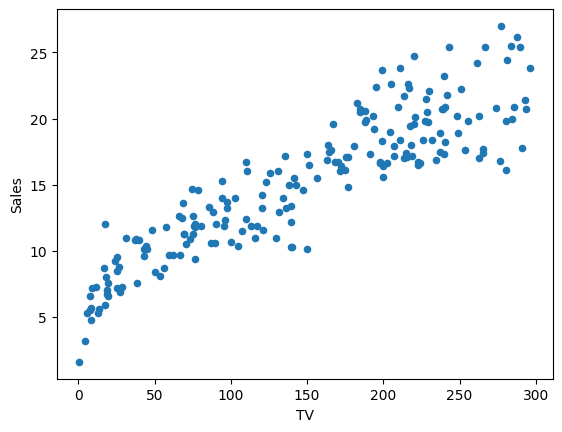

In [31]:
# finding out the relation between TV and Sales .
# Ploting scatter graph.
df.plot(kind = "scatter" ,x='TV',y='Sales')

Text(0.5, 1.0, 'Sale of TV')

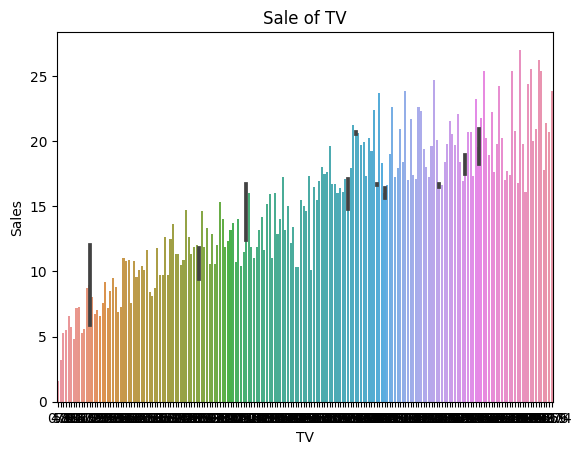

In [32]:
# plotting bar graph
sns.barplot(x='TV',y='Sales',data=df)
plt.ylabel('Sales')
plt.xlabel('TV')
plt.title('Sale of TV')

## Splitting Data into train-test dataset
    Split the dataset into a training set and a testing set to evaluate the model's performance on unseen data.The training dataset is used to train the model, while the testing dataset is used to evaluate how well the model generalizes to unseen data.
    There are several methods for doing so . Some of them are -

    1.Holdout Method (Simple Train-Test Split):
        Description: The dataset is split into two subsets: a training set and a testing set. Typically, a fixed percentage (e.g., 70% training and 30% testing) of the data is used for each set.
        Implementation: Use train_test_split() function from Scikit-learn with test_size parameter.

    2.K-Fold Cross-Validation:
        Description: The dataset is divided into k subsets (folds), and the model is trained and evaluated k times. In each iteration, one of the folds is used as the testing set, while the rest are used for training.
        Implementation: Use KFold or StratifiedKFold classes from Scikit-learn.
        
    3.Stratified Sampling:
        Description: This technique ensures that the class distribution in the training and testing datasets remains consistent with the original dataset. It is particularly useful for imbalanced datasets where some classes have a much smaller representation.
        Implementation: Use train_test_split() function with stratify parameter or StratifiedKFold from Scikit-learn.

    4.Shuffle and Split:
        Description: This method shuffles the data and then splits it into training and testing sets, often useful for large datasets.
        Implementation: Use ShuffleSplit or StratifiedShuffleSplit from Scikit-learn.

    And so on.......

In [33]:
#importing libraries.
from sklearn.model_selection import train_test_split

In [34]:
# Here we use Holdout Method
X = df[['TV','Radio','Newspaper']]
Y = df['Sales']
X_train , X_test ,Y_train , Y_test =train_test_split(X,Y, test_size=0.2 , train_size=0.8, random_state=0)

In [35]:
X_train

,TV,Radio,Newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6
...,...,...,...
67,139.3,14.5,10.2
192,17.2,4.1,31.6
117,76.4,0.8,14.8
47,239.9,41.5,18.5


In [36]:
Y_train

134    10.8
66     11.0
26     15.0
113    20.9
168    17.1
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: Sales, Length: 160, dtype: float64

In [37]:
X_test

,TV,Radio,Newspaper
18,69.2,20.5,18.3
170,50.0,11.6,18.4
107,90.4,0.3,23.2
98,289.7,42.3,51.2
177,170.2,7.8,35.2
182,56.2,5.7,29.7
5,8.7,48.9,75.0
146,240.1,7.3,8.7
12,23.8,35.1,65.9
152,197.6,23.3,14.2


In [38]:
Y_test

18     11.3
170     8.4
107    12.0
98     25.4
177    16.7
182     8.7
5       7.2
146    18.2
12      9.2
152    16.6
61     24.2
125    10.6
180    15.5
154    20.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     16.1
159    12.9
60      8.1
123    15.2
179    17.6
185    22.6
122    16.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      17.9
83     13.6
106     7.2
Name: Sales, dtype: float64

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 134 to 172
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         160 non-null    float64
 1   Radio      160 non-null    float64
 2   Newspaper  160 non-null    float64
dtypes: float64(3)
memory usage: 5.0 KB


In [40]:
Y_train.info()

<class 'pandas.core.series.Series'>
Index: 160 entries, 134 to 172
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
160 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [41]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 18 to 106
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         40 non-null     float64
 1   Radio      40 non-null     float64
 2   Newspaper  40 non-null     float64
dtypes: float64(3)
memory usage: 1.2 KB


In [42]:
Y_test.info()

<class 'pandas.core.series.Series'>
Index: 40 entries, 18 to 106
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
40 non-null     float64
dtypes: float64(1)
memory usage: 640.0 bytes


In [43]:
train = pd.concat([X_train,Y_train],axis = 1)
train.head()

,TV,Radio,Newspaper,Sales
134,36.9,38.6,65.6,10.8
66,31.5,24.6,2.2,11.0
26,142.9,29.3,12.6,15.0
113,209.6,20.6,10.7,20.9
168,215.4,23.6,57.6,17.1


In [44]:
test = X_test # we shoudnot wanted to combine the survived column in test data .
test.head()

,TV,Radio,Newspaper
18,69.2,20.5,18.3
170,50.0,11.6,18.4
107,90.4,0.3,23.2
98,289.7,42.3,51.2
177,170.2,7.8,35.2


In [45]:
# There is one columns less in test dataset than train dataset .
#This is because Survived is our response variable, or sometimes called a target variable.

##  Model Training
    Model training is the process of using a machine learning algorithm to learn from the training data and develop a 
    predictive model. There are various methods and techniques involved in model training, depending on the type of 
    machine learning algorithm and the problem being solved. 
    Here are some common methods of model training:

    1.Supervised Learning:
        In supervised learning, the algorithm is trained on a labeled dataset where the input features and their 
        corresponding target labels are known. Common methods for supervised learning include:
        A.Linear Regression:
            Linear regression models the relationship between the input features and the numeric target variable by fitting  
            a linear equation. It is used for regression tasks.
        B.Logistic Regression:
            Logistic regression is used for binary classification problems, where the target variable has two classes. It 
            models the probability of the target belonging to a certain class using a logistic function.
        C.Decision Trees:
            Decision trees recursively split the data into subsets based on feature values to make classification decisions. 
            They can be used for both classification and regression tasks.
        D.Random Forest:
            Random Forest is an ensemble method that combines multiple decision trees to improve performance and handle 
            complex datasets.
        E.K-Nearest Neighbors (KNN):
            KNN classifies data points based on the majority class of their k-nearest neighbors in the feature space.
        F.Naive Bayes:
            Naive Bayes classifiers are probabilistic models based on Bayes' theorem. They are often used for text 
            classification and other simple classification tasks.
        G.Perceptron:
            The perceptron is a simple linear classifier used for binary classification tasks.
        H.Support Vector Machines (SVM):
            SVM is a powerful algorithm for binary and multiclass classification tasks. It finds the optimal hyperplane that 
            separates classes with the maximum margin.
        I.Gradient Boosting:
            Gradient boosting algorithms, such as XGBoost,LightGBM and CatBoost , are ensemble methods that iteratively  
            train weak learners to correct errors made by previous learners.

    2.Unsupervised Learning:
        In unsupervised learning, the algorithm is trained on an unlabeled dataset, and it attempts to find patterns, 
        structures, or representations within the data. 
        Common methods for unsupervised learning include:
        A.K-Means Clustering: 
            Group data into k clusters based on similarity.
        B.Principal Component Analysis (PCA): 
            Reduce the dimensionality of the data by finding orthogonal components capturing most variance.

    3.Reinforcement Learning:
        In reinforcement learning, the model learns by interacting with an environment and receiving feedback in the form of 
        rewards or penalties. 
        Common methods for reinforcement learning include:
        A.Q-Learning: 
            Update action-values based on the reward signal and the expected future rewards.

### Simple Linear Regression

In [46]:
#importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [47]:
X = train
Y = train['Sales']

In [48]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [49]:
slope = model.coef_[0]
intercept = model.intercept_
print("Slope (Weight):", slope)
print("Intercept:", intercept)

Slope (Weight): 8.529784138776456e-18
Intercept: 7.105427357601002e-15


Estimated coefficients:
b_0 = 7.162275968528906         
b_1 = 0.054434301725928974


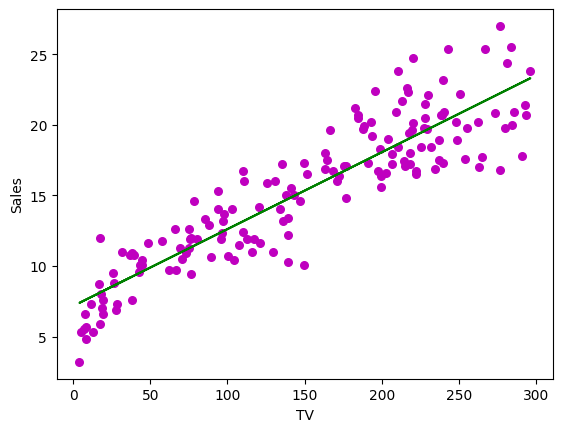

In [50]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
            marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "g")

    # putting labels
    plt.xlabel('TV')
    plt.ylabel('Sales')

    # function to show plot
    plt.show()

def main():
    # observations / data
    x = train['TV']
    y = train['Sales']

    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {} \
        \nb_1 = {}".format(b[0], b[1]))

    # plotting regression line
    plot_regression_line(x, y, b)

if __name__ == "__main__":
    main()


## Results

### Preparing Data For Submission

In [51]:
# Create sub,ission dataframe
submit = pd.DataFrame({'TV': test['TV'],'Radio': test['Radio'] ,'Newspaper': test['Newspaper'],'Sales' :Y_train})
submit.shape

(200, 4)

### Returning result in csv format

In [52]:
# Create and save csv file
submit.to_csv("result.csv",index= False)